# 4 Processing, Modeling and Cluster Analysis <a id='2_Data_wrangling'></a>

## 4.1 Introduction<a id='2.2_Introduction'></a>

This dataset consist of several CSV files that contain number of geometric features of thousands of channel holes fabricated at nano-meter dimensions on a semconductor substrate. The data has two parts 
1. Original features i.e. the geometric features are measured from image data that are unprocessed, 
2. Enhanced features i.e. geometric features are collected from processed images. 

We use various clustering techniques to explore possible inter-relationship between features, formation of clusters, localization of reature clusters with respect to X and Y location, etc. This will implicitely tell the stake holder whether there is any inherent fault with the imaging instrument or imaging protocol that produces feature variations and its dependency on location.

## 3.2 Imports<a id='2.3_Imports'></a>

Placing imports together at the start 

In [2]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
import copy
import string

## 3.3 Load Wrangled Data: <a id='2.5_Load_The_Ski_Resort_Data'></a>

In [3]:
path =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\original\*'
# Get the list of all files in directory tree at given path

fx = []
for file in glob.glob(path):
    fx.append(file)

##### Read CSV files into a panda dataframe

In [4]:
dfx = [] # data frame of frame of frames

for file in fx:
    df = pd.read_csv(file, header=None)
    dfx.append(df)

dfx[0].head()

0                                                  1      2   \
0    NaN                                          file_name  label   
1  322.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  323.0   
2  323.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  324.0   
3  324.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  325.0   
4  325.0  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  326.0   

               3                  4                  5                   6   \
0  location (X_Y)               area        area_fitted           perimeter   
1       2774_1038  74.00119566057943  82.40424400115718  29.940978318101767   
2        966_1108  75.61169714667143  83.89703680634835  30.107693118898997   
3        128_1112  80.65790864834081  88.92468458801584  31.061576917792518   
4        220_1110  76.40421872188904   84.6335599075658   30.19070518336819   

                   7                    8                   9   \
0    perimeter_Fitted  areaEnclosingCircle      areaFitEllipse   
1   32.81250022503177    80.32151211308145  148.95775377056276   
2   32.81250022503177     81.0344795999427   151.9261193943553   
3  33.838137462858974    86.34298768075384  162.72058046524324   
4   32.81250022503177    81.81897432764279  154.11398193067006   

                     10                 11                12  \
0  areaMinAreaRectangle       eccentricity       orientation   
1     84.55587532680144  0.930036015869853   90.685676574707   
2       85.020898792498  0.917029194698263  78.7483444213867   
3     90.43095382897755  0.921181150203611   84.950309753418   
4       85.020898792498  0.913853326079515    87.97509765625   

                  13                  14                  15  \
0          convexity            0degDiam           45degDiam   
1   0.96961861667744  23.927177016940384   23.74794306882177   
2  0.975700934579439  23.567348174964447  23.567348174964447   
3  0.977509599561163  23.567348174964447  23.567348174964447   
4  0.979779411764706  23.927177016940384   23.74794306882177   

                   16                  17  
0           90degDiam          135degDiam  
1  24.105076228877603   23.74794306882177  
2  24.105076228877603  24.105076228877603  
3  24.105076228877603   23.74794306882177  
4  24.105076228877603  23.927177016940384

In [5]:

for i in range(0, len(dfx)):
    dfx[i] = dfx[i].dropna(axis='columns')
dfx[0].head()

1      2               3   \
0                                          file_name  label  location (X_Y)   
1  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  323.0       2774_1038   
2  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  324.0        966_1108   
3  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  325.0        128_1112   
4  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  326.0        220_1110   

                  4                  5                   6   \
0               area        area_fitted           perimeter   
1  74.00119566057943  82.40424400115718  29.940978318101767   
2  75.61169714667143  83.89703680634835  30.107693118898997   
3  80.65790864834081  88.92468458801584  31.061576917792518   
4  76.40421872188904   84.6335599075658   30.19070518336819   

                   7                    8                   9   \
0    perimeter_Fitted  areaEnclosingCircle      areaFitEllipse   
1   32.81250022503177    80.32151211308145  148.95775377056276   
2   32.81250022503177     81.0344795999427   151.9261193943553   
3  33.838137462858974    86.34298768075384  162.72058046524324   
4   32.81250022503177    81.81897432764279  154.11398193067006   

                     10                 11                12  \
0  areaMinAreaRectangle       eccentricity       orientation   
1     84.55587532680144  0.930036015869853   90.685676574707   
2       85.020898792498  0.917029194698263  78.7483444213867   
3     90.43095382897755  0.921181150203611   84.950309753418   
4       85.020898792498  0.913853326079515    87.97509765625   

                  13                  14                  15  \
0          convexity            0degDiam           45degDiam   
1   0.96961861667744  23.927177016940384   23.74794306882177   
2  0.975700934579439  23.567348174964447  23.567348174964447   
3  0.977509599561163  23.567348174964447  23.567348174964447   
4  0.979779411764706  23.927177016940384   23.74794306882177   

                   16                  17  
0           90degDiam          135degDiam  
1  24.105076228877603   23.74794306882177  
2  24.105076228877603  24.105076228877603  
3  24.105076228877603   23.74794306882177  
4  24.105076228877603  23.927177016940384

In [6]:
## Read header descriptor file
header_descriptor = r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\header.csv'
df = pd.read_csv(header_descriptor)
dflx= df.columns.tolist()
dfl=[]

for i in range(0, len(dflx)):
    dfl.append(dflx[i].strip())
    
dfl.insert(1, "label")

for f in range(0, len(dfx)):
        dfx[f].columns=dfl
        dfx[f]=dfx[f].drop(0)

# #remove the labels with '0' label as it indicates triplicate is not fully present
# for f in range(0, len(dfx)):
#         dfx[f]=dfx[f][dfx[f].label != 0]

dfx[0].head()


file_name  label location (X_Y)  \
1  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  323.0      2774_1038   
2  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  324.0       966_1108   
3  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  325.0       128_1112   
4  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  326.0       220_1110   
5  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  327.0       406_1110   

                area        area_fitted           perimeter  \
1  74.00119566057943  82.40424400115718  29.940978318101767   
2  75.61169714667143  83.89703680634835  30.107693118898997   
3  80.65790864834081  88.92468458801584  31.061576917792518   
4  76.40421872188904   84.6335599075658   30.19070518336819   
5  75.41831653043079  83.80996149818898  30.225023186582472   

     perimeter_Fitted areaEnclosingCircle      areaFitEllipse  \
1   32.81250022503177   80.32151211308145  148.95775377056276   
2   32.81250022503177    81.0344795999427   151.9261193943553   
3  33.838137462858974   86.34298768075384  162.72058046524324   
4   32.81250022503177   81.81897432764279  154.11398193067006   
5   33.07189161511812   80.68270277509598  152.11939909623496   

  areaMinAreaRectangle       eccentricity       orientation  \
1    84.55587532680144  0.930036015869853   90.685676574707   
2      85.020898792498  0.917029194698263  78.7483444213867   
3    90.43095382897755  0.921181150203611   84.950309753418   
4      85.020898792498  0.913853326079515    87.97509765625   
5     86.3502299548336  0.933167384394772   104.24934387207   

           convexity            0degDiam           45degDiam  \
1   0.96961861667744  23.927177016940384   23.74794306882177   
2  0.975700934579439  23.567348174964447  23.567348174964447   
3  0.977509599561163  23.567348174964447  23.567348174964447   
4  0.979779411764706  23.927177016940384   23.74794306882177   
5  0.969508400746733  24.105076228877603   23.74794306882177   

            90degDiam          135degDiam  
1  24.105076228877603   23.74794306882177  
2  24.105076228877603  24.105076228877603  
3  24.105076228877603   23.74794306882177  
4  24.105076228877603  23.927177016940384  
5  24.105076228877603  23.567348174964447

In [7]:
#remove the labels with '0' label as it indicates triplicate is not fully present
for f in range(0, len(dfx)):
        dfx[f]=dfx[f][dfx[f].label != "0"]

In [8]:
dfx[0].head()

file_name  label location (X_Y)  \
1  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  323.0      2774_1038   
2  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  324.0       966_1108   
3  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  325.0       128_1112   
4  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  326.0       220_1110   
5  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  327.0       406_1110   

                area        area_fitted           perimeter  \
1  74.00119566057943  82.40424400115718  29.940978318101767   
2  75.61169714667143  83.89703680634835  30.107693118898997   
3  80.65790864834081  88.92468458801584  31.061576917792518   
4  76.40421872188904   84.6335599075658   30.19070518336819   
5  75.41831653043079  83.80996149818898  30.225023186582472   

     perimeter_Fitted areaEnclosingCircle      areaFitEllipse  \
1   32.81250022503177   80.32151211308145  148.95775377056276   
2   32.81250022503177    81.0344795999427   151.9261193943553   
3  33.838137462858974   86.34298768075384  162.72058046524324   
4   32.81250022503177   81.81897432764279  154.11398193067006   
5   33.07189161511812   80.68270277509598  152.11939909623496   

  areaMinAreaRectangle       eccentricity       orientation  \
1    84.55587532680144  0.930036015869853   90.685676574707   
2      85.020898792498  0.917029194698263  78.7483444213867   
3    90.43095382897755  0.921181150203611   84.950309753418   
4      85.020898792498  0.913853326079515    87.97509765625   
5     86.3502299548336  0.933167384394772   104.24934387207   

           convexity            0degDiam           45degDiam  \
1   0.96961861667744  23.927177016940384   23.74794306882177   
2  0.975700934579439  23.567348174964447  23.567348174964447   
3  0.977509599561163  23.567348174964447  23.567348174964447   
4  0.979779411764706  23.927177016940384   23.74794306882177   
5  0.969508400746733  24.105076228877603   23.74794306882177   

            90degDiam          135degDiam  
1  24.105076228877603   23.74794306882177  
2  24.105076228877603  24.105076228877603  
3  24.105076228877603   23.74794306882177  
4  24.105076228877603  23.927177016940384  
5  24.105076228877603  23.567348174964447

##### split the location in to X and Y columns to explore possible relationship between location, feature and feature variation

In [9]:
for f in range(0, len(dfx)): # there are about 11 data sets (each with triplicate measurements)
    lx =[]
    ly =[]
    for f1 in range(0, len(dfx[f])):
        loc = dfx[f].iloc[f1]['location (X_Y)']
        x = float(loc.split("_")[0])
        y = float(loc.split("_")[1])
        lx.append(x)
        ly.append(y)
    dfx[f].insert(3, "X", lx, True)
    dfx[f].insert(4, "Y", ly, True)

dfx[0].head()

file_name  label location (X_Y)  \
1  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  323.0      2774_1038   
2  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  324.0       966_1108   
3  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  325.0       128_1112   
4  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  326.0       220_1110   
5  OneDrive_MicronDRAM_Middle_20210121_DMprecisio...  327.0       406_1110   

        X       Y               area        area_fitted           perimeter  \
1  2774.0  1038.0  74.00119566057943  82.40424400115718  29.940978318101767   
2   966.0  1108.0  75.61169714667143  83.89703680634835  30.107693118898997   
3   128.0  1112.0  80.65790864834081  88.92468458801584  31.061576917792518   
4   220.0  1110.0  76.40421872188904   84.6335599075658   30.19070518336819   
5   406.0  1110.0  75.41831653043079  83.80996149818898  30.225023186582472   

     perimeter_Fitted areaEnclosingCircle      areaFitEllipse  \
1   32.81250022503177   80.32151211308145  148.95775377056276   
2   32.81250022503177    81.0344795999427   151.9261193943553   
3  33.838137462858974   86.34298768075384  162.72058046524324   
4   32.81250022503177   81.81897432764279  154.11398193067006   
5   33.07189161511812   80.68270277509598  152.11939909623496   

  areaMinAreaRectangle       eccentricity       orientation  \
1    84.55587532680144  0.930036015869853   90.685676574707   
2      85.020898792498  0.917029194698263  78.7483444213867   
3    90.43095382897755  0.921181150203611   84.950309753418   
4      85.020898792498  0.913853326079515    87.97509765625   
5     86.3502299548336  0.933167384394772   104.24934387207   

           convexity            0degDiam           45degDiam  \
1   0.96961861667744  23.927177016940384   23.74794306882177   
2  0.975700934579439  23.567348174964447  23.567348174964447   
3  0.977509599561163  23.567348174964447  23.567348174964447   
4  0.979779411764706  23.927177016940384   23.74794306882177   
5  0.969508400746733  24.105076228877603   23.74794306882177   

            90degDiam          135degDiam  
1  24.105076228877603   23.74794306882177  
2  24.105076228877603  24.105076228877603  
3  24.105076228877603   23.74794306882177  
4  24.105076228877603  23.927177016940384  
5  24.105076228877603  23.567348174964447

######## convert object to numeric

In [10]:
dfl = (dfx[0].columns)

for f in range(0, len(dfx)):
    for fn in dfl:
        dfx[f][fn] = pd.to_numeric(dfx[f][fn], errors='coerce')

In [11]:
dfx[0].head()

file_name  label  location (X_Y)       X       Y       area  area_fitted  \
1        NaN  323.0             NaN  2774.0  1038.0  74.001196    82.404244   
2        NaN  324.0             NaN   966.0  1108.0  75.611697    83.897037   
3        NaN  325.0             NaN   128.0  1112.0  80.657909    88.924685   
4        NaN  326.0             NaN   220.0  1110.0  76.404219    84.633560   
5        NaN  327.0             NaN   406.0  1110.0  75.418317    83.809961   

   perimeter  perimeter_Fitted  areaEnclosingCircle  areaFitEllipse  \
1  29.940978         32.812500            80.321512      148.957754   
2  30.107693         32.812500            81.034480      151.926119   
3  31.061577         33.838137            86.342988      162.720580   
4  30.190705         32.812500            81.818974      154.113982   
5  30.225023         33.071892            80.682703      152.119399   

   areaMinAreaRectangle  eccentricity  orientation  convexity   0degDiam  \
1             84.555875      0.930036    90.685677   0.969619  23.927177   
2             85.020899      0.917029    78.748344   0.975701  23.567348   
3             90.430954      0.921181    84.950310   0.977510  23.567348   
4             85.020899      0.913853    87.975098   0.979779  23.927177   
5             86.350230      0.933167   104.249344   0.969508  24.105076   

   45degDiam  90degDiam  135degDiam  
1  23.747943  24.105076   23.747943  
2  23.567348  24.105076   24.105076  
3  23.567348  24.105076   23.747943  
4  23.747943  24.105076   23.927177  
5  23.747943  24.105076   23.567348

In [12]:
for f in range(0, len(dfx)):
        dfx[f]=dfx[f].dropna(axis=1)

dfx[0].head()

label       X       Y       area  area_fitted  perimeter  perimeter_Fitted  \
1  323.0  2774.0  1038.0  74.001196    82.404244  29.940978         32.812500   
2  324.0   966.0  1108.0  75.611697    83.897037  30.107693         32.812500   
3  325.0   128.0  1112.0  80.657909    88.924685  31.061577         33.838137   
4  326.0   220.0  1110.0  76.404219    84.633560  30.190705         32.812500   
5  327.0   406.0  1110.0  75.418317    83.809961  30.225023         33.071892   

   areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1            80.321512      148.957754             84.555875      0.930036   
2            81.034480      151.926119             85.020899      0.917029   
3            86.342988      162.720580             90.430954      0.921181   
4            81.818974      154.113982             85.020899      0.913853   
5            80.682703      152.119399             86.350230      0.933167   

   orientation  convexity   0degDiam  45degDiam  90degDiam  135degDiam  
1    90.685677   0.969619  23.927177  23.747943  24.105076   23.747943  
2    78.748344   0.975701  23.567348  23.567348  24.105076   24.105076  
3    84.950310   0.977510  23.567348  23.567348  24.105076   23.747943  
4    87.975098   0.979779  23.927177  23.747943  24.105076   23.927177  
5   104.249344   0.969508  24.105076  23.747943  24.105076   23.567348

In [13]:
dfx[1].head()

label      X       Y       area  area_fitted  perimeter  perimeter_Fitted  \
1  324.0  958.0  1088.0  75.030060    83.329421  30.156348         32.551042   
2  325.0  118.0  1090.0  80.635274    89.006756  31.255494         34.089726   
3  326.0  212.0  1092.0  76.475859    84.805930  30.390180         33.071892   
4  327.0  398.0  1090.0  74.810780    83.241752  30.142106         33.071892   
5  328.0  676.0  1090.0  74.761964    83.110075  30.024451         32.812500   

   areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1            80.590521      152.198505             83.722794      0.937859   
2            87.538779      163.493037             91.713727      0.944779   
3            81.315237      154.231681             85.808339      0.929383   
4            81.326090      150.133665             85.020899      0.901601   
5            80.522921      150.401775             84.934981      0.905185   

   orientation  convexity   0degDiam  45degDiam  90degDiam  135degDiam  
1    74.027878   0.969811  23.927177  23.385359  24.105076   23.747943  
2    75.765022   0.968988  24.105076  24.105076  24.105076   23.747943  
3    82.846664   0.971498  24.456993  23.747943  24.105076   23.385359  
4   100.081467   0.968414  24.281672  23.747943  24.105076   23.567348  
5    95.048309   0.968987  23.927177  23.747943  24.105076   23.567348

In [14]:
dfx[2].head()

label      X       Y       area  area_fitted  perimeter  perimeter_Fitted  \
1    324  952.0  1070.0  74.272038    82.581267  29.906334         32.551042   
2    325  112.0  1072.0  80.249512    88.595637  31.014342         34.089726   
3    326  206.0  1076.0  75.515069    83.940541  30.390180         33.071892   
4    327  392.0  1074.0  74.957038    83.197883  29.906334         32.551042   
5    328  668.0  1072.0  75.054385    83.373221  30.024451         32.812500   

   areaEnclosingCircle  areaFitEllipse  areaMinAreaRectangle  eccentricity  \
1            80.763977      149.222382             83.591874      0.889549   
2            86.347817      162.019766             91.693814      0.899179   
3            81.081658      152.240837             85.020899      0.915795   
4            80.821949      151.556197             83.591874      0.918368   
5            81.117397      152.631516             85.020899      0.935619   

   orientation  convexity   0degDiam  45degDiam  90degDiam  135degDiam  
1    77.532021   0.972329  23.927177  23.567348  24.105076   23.567348  
2    81.122856   0.972973  24.281672  24.456993  24.105076   23.927177  
3    89.837952   0.963603  24.281672  23.747943  24.105076   23.385359  
4    87.587372   0.977764  24.281672  23.927177  24.105076   23.385359  
5    94.915878   0.975348  24.281672  24.105076  24.105076   23.567348

#### Calculate the standard deviation of the triplicate measurements

In [15]:
mean=[]
std=[]

#short method to return mean and standard deviation
def getStat(i1, i2, i3):
    arr = np.array([i1, i2, i3])

    if(i2!=-1 and i3==-1):
        arr = np.array([i1, i2])
    elif(i2==-1 and i3!=-1):
        arr=np.array([i1, i3])
    elif(i2==-1 and i3==-1):
        arr=np.array([i1])

    m = np.mean(arr)
    s = np.std(arr)
    return m, s


for k in range(0, len(dfx), 3):
    mn = pd.DataFrame(index=range(dfx[k].shape[0]),columns=range(dfx[k].shape[1]))
    sd = pd.DataFrame(index=range(dfx[k].shape[0]),columns=range(dfx[k].shape[1]))
    mn = pd.DataFrame(data=mn.values, columns=dfx[k].columns)
    sd = pd.DataFrame(data=sd.values, columns=dfx[k].columns)
    ######### read the triplets with first df as primary and calculate standard deviation
    for k1 in range(0, len(dfx[k])):
        for ft in dfx[k].columns:
            if ft == "label" or ft=="X" or ft == "Y":
                mn.at[k1, ft]=dfx[k+0].iloc[k1][ft]
                sd.at[k1, ft]=dfx[k+0].iloc[k1][ft]
                continue
            m=-1
            s=-1
            if(k1<len(dfx[k+1])) and (k1<len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], dfx[k+1].iloc[k1][ft], dfx[k+2].iloc[k1][ft])
            elif(k1 < len(dfx[k+1])) and (k1 >= len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], dfx[k+1].iloc[k1][ft], -1)
            elif(k1 >= len(dfx[k+1])) and (k1 < len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], -1, dfx[k+2].iloc[k1][ft])
            elif(k1 >= len(dfx[k+1])) and (k1 >= len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], -1, -1)
                    
            mn.at[k1, ft]=m
            sd.at[k1, ft]=s
    #########
    mean.append(mn)
    std.append(sd)


In [16]:
mean[0].head()

label       X       Y       area area_fitted  perimeter perimeter_Fitted  \
0  323.0  2774.0  1038.0  74.434431   82.771644   30.00122        32.638195   
1  324.0   966.0  1108.0  78.832161   87.166477   30.79251        33.663984   
2  325.0   128.0  1112.0  77.549612   85.890385  30.613979        33.327307   
3  326.0   220.0  1110.0  75.390679   83.691065  30.079715        32.811811   
4  327.0   406.0  1110.0  75.078222   83.431086  30.091309        32.898964   

  areaEnclosingCircle areaFitEllipse areaMinAreaRectangle eccentricity  \
0            80.55867     150.126214            83.956848     0.919148   
1           84.973692     159.146308            89.476146     0.920329   
2           82.913294       156.3977            87.086731      0.92212   
3           81.322338     151.934615            84.544557     0.911274   
4            80.77434     151.717563             85.43537     0.924657   

  orientation convexity   0degDiam  45degDiam  90degDiam 135degDiam  
0   80.748525  0.970586  23.927177  23.566883  24.105076  23.687745  
1   78.545408  0.972554  23.984699  24.043139  24.105076  23.926732  
2   85.878309   0.97087  24.102004  23.687745  24.105076   23.50622  
3   91.881312  0.975319  24.163507  23.807688  24.105076  23.626628  
4   98.071177  0.971281  24.104642  23.866987  24.105076  23.567348

#### Overall variation of the mean

<AxesSubplot:>

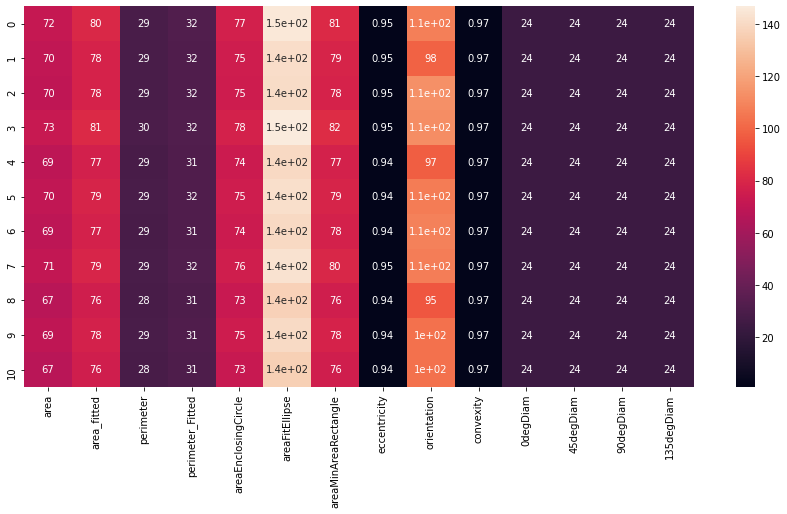

In [17]:
#Find average of each standard deviation column and display
avg_mean=[]
ftx=[]
for ft in mean[0].columns:
    if ft == "label" or ft=="X" or ft == "Y":
        continue
    ftx.append(ft)
    
for k in range(0,len(mean)):
    avg=[]
    for ft in mean[k].columns:
        if ft == "label" or ft=="X" or ft=="Y":
            continue
        mn = mean[k][ft].mean()
        avg.append(mn)
    avg_mean.append(avg)
    
df = pd.DataFrame(avg_mean)
df.columns = ftx
fig, ax = plt.subplots(figsize = (15, 7)) 
sns.heatmap(df, annot = True)

In [18]:
std[0].head()

label       X       Y      area area_fitted perimeter perimeter_Fitted  \
0  323.0  2774.0  1038.0  0.435446    0.400974    0.1106         0.123253   
1  324.0   966.0  1108.0  2.282651    2.317928  0.494145          0.60209   
2  325.0   128.0  1112.0  2.232623    2.174466    0.3165         0.361212   
3  326.0   220.0  1110.0  0.719164    0.666685  0.124194         0.212637   
4  327.0   406.0  1110.0  0.268484    0.288642   0.09455         0.122278   

  areaEnclosingCircle areaFitEllipse areaMinAreaRectangle eccentricity  \
0            0.182034       1.469309             0.426935     0.021172   
1             2.82756        5.14075             3.150346     0.018762   
2            2.427033       4.544226             2.386474     0.005587   
3            0.407043       1.646841             0.673649     0.007084   
4            0.251195       0.953604             0.647854     0.013805   

  orientation convexity  0degDiam 45degDiam 90degDiam 135degDiam  
0    7.170774  0.001235       0.0  0.148025       0.0   0.085133  
1    2.192029  0.002756   0.30379  0.365827       0.0   0.145799  
2    2.928641  0.005695  0.384775  0.085133       0.0   0.170924  
3    5.800545  0.004951  0.167111  0.084492       0.0   0.225133  
4    4.368958  0.002883  0.144722  0.168354       0.0        0.0

##### Overall variation of the standard deviation

<AxesSubplot:>

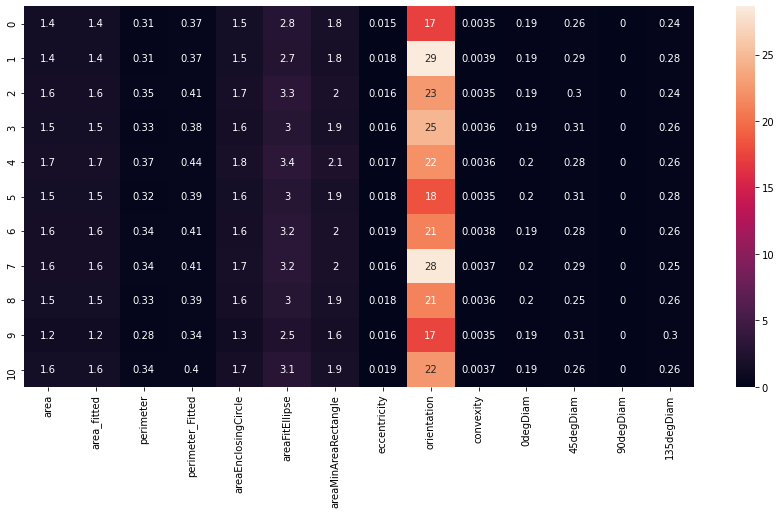

In [19]:
#Find average of each standard deviation column and display
avg_std=[]
ftx=[]
for ft in std[0].columns:
    if ft == "label" or ft=="X" or ft == "Y":
        continue
    ftx.append(ft)
    
for k in range(0,len(std)):
    avg=[]
    for ft in std[k].columns:
        if ft == "label" or ft=="X" or ft=="Y":
            continue
        mn = std[k][ft].mean()
        avg.append(mn)
    avg_std.append(avg)
    
df = pd.DataFrame(avg_std)
df.columns = ftx
fig, ax = plt.subplots(figsize = (15, 7)) 
sns.heatmap(df, annot = True)

##### Now let us analyze individual features and their variation withrespect to the location

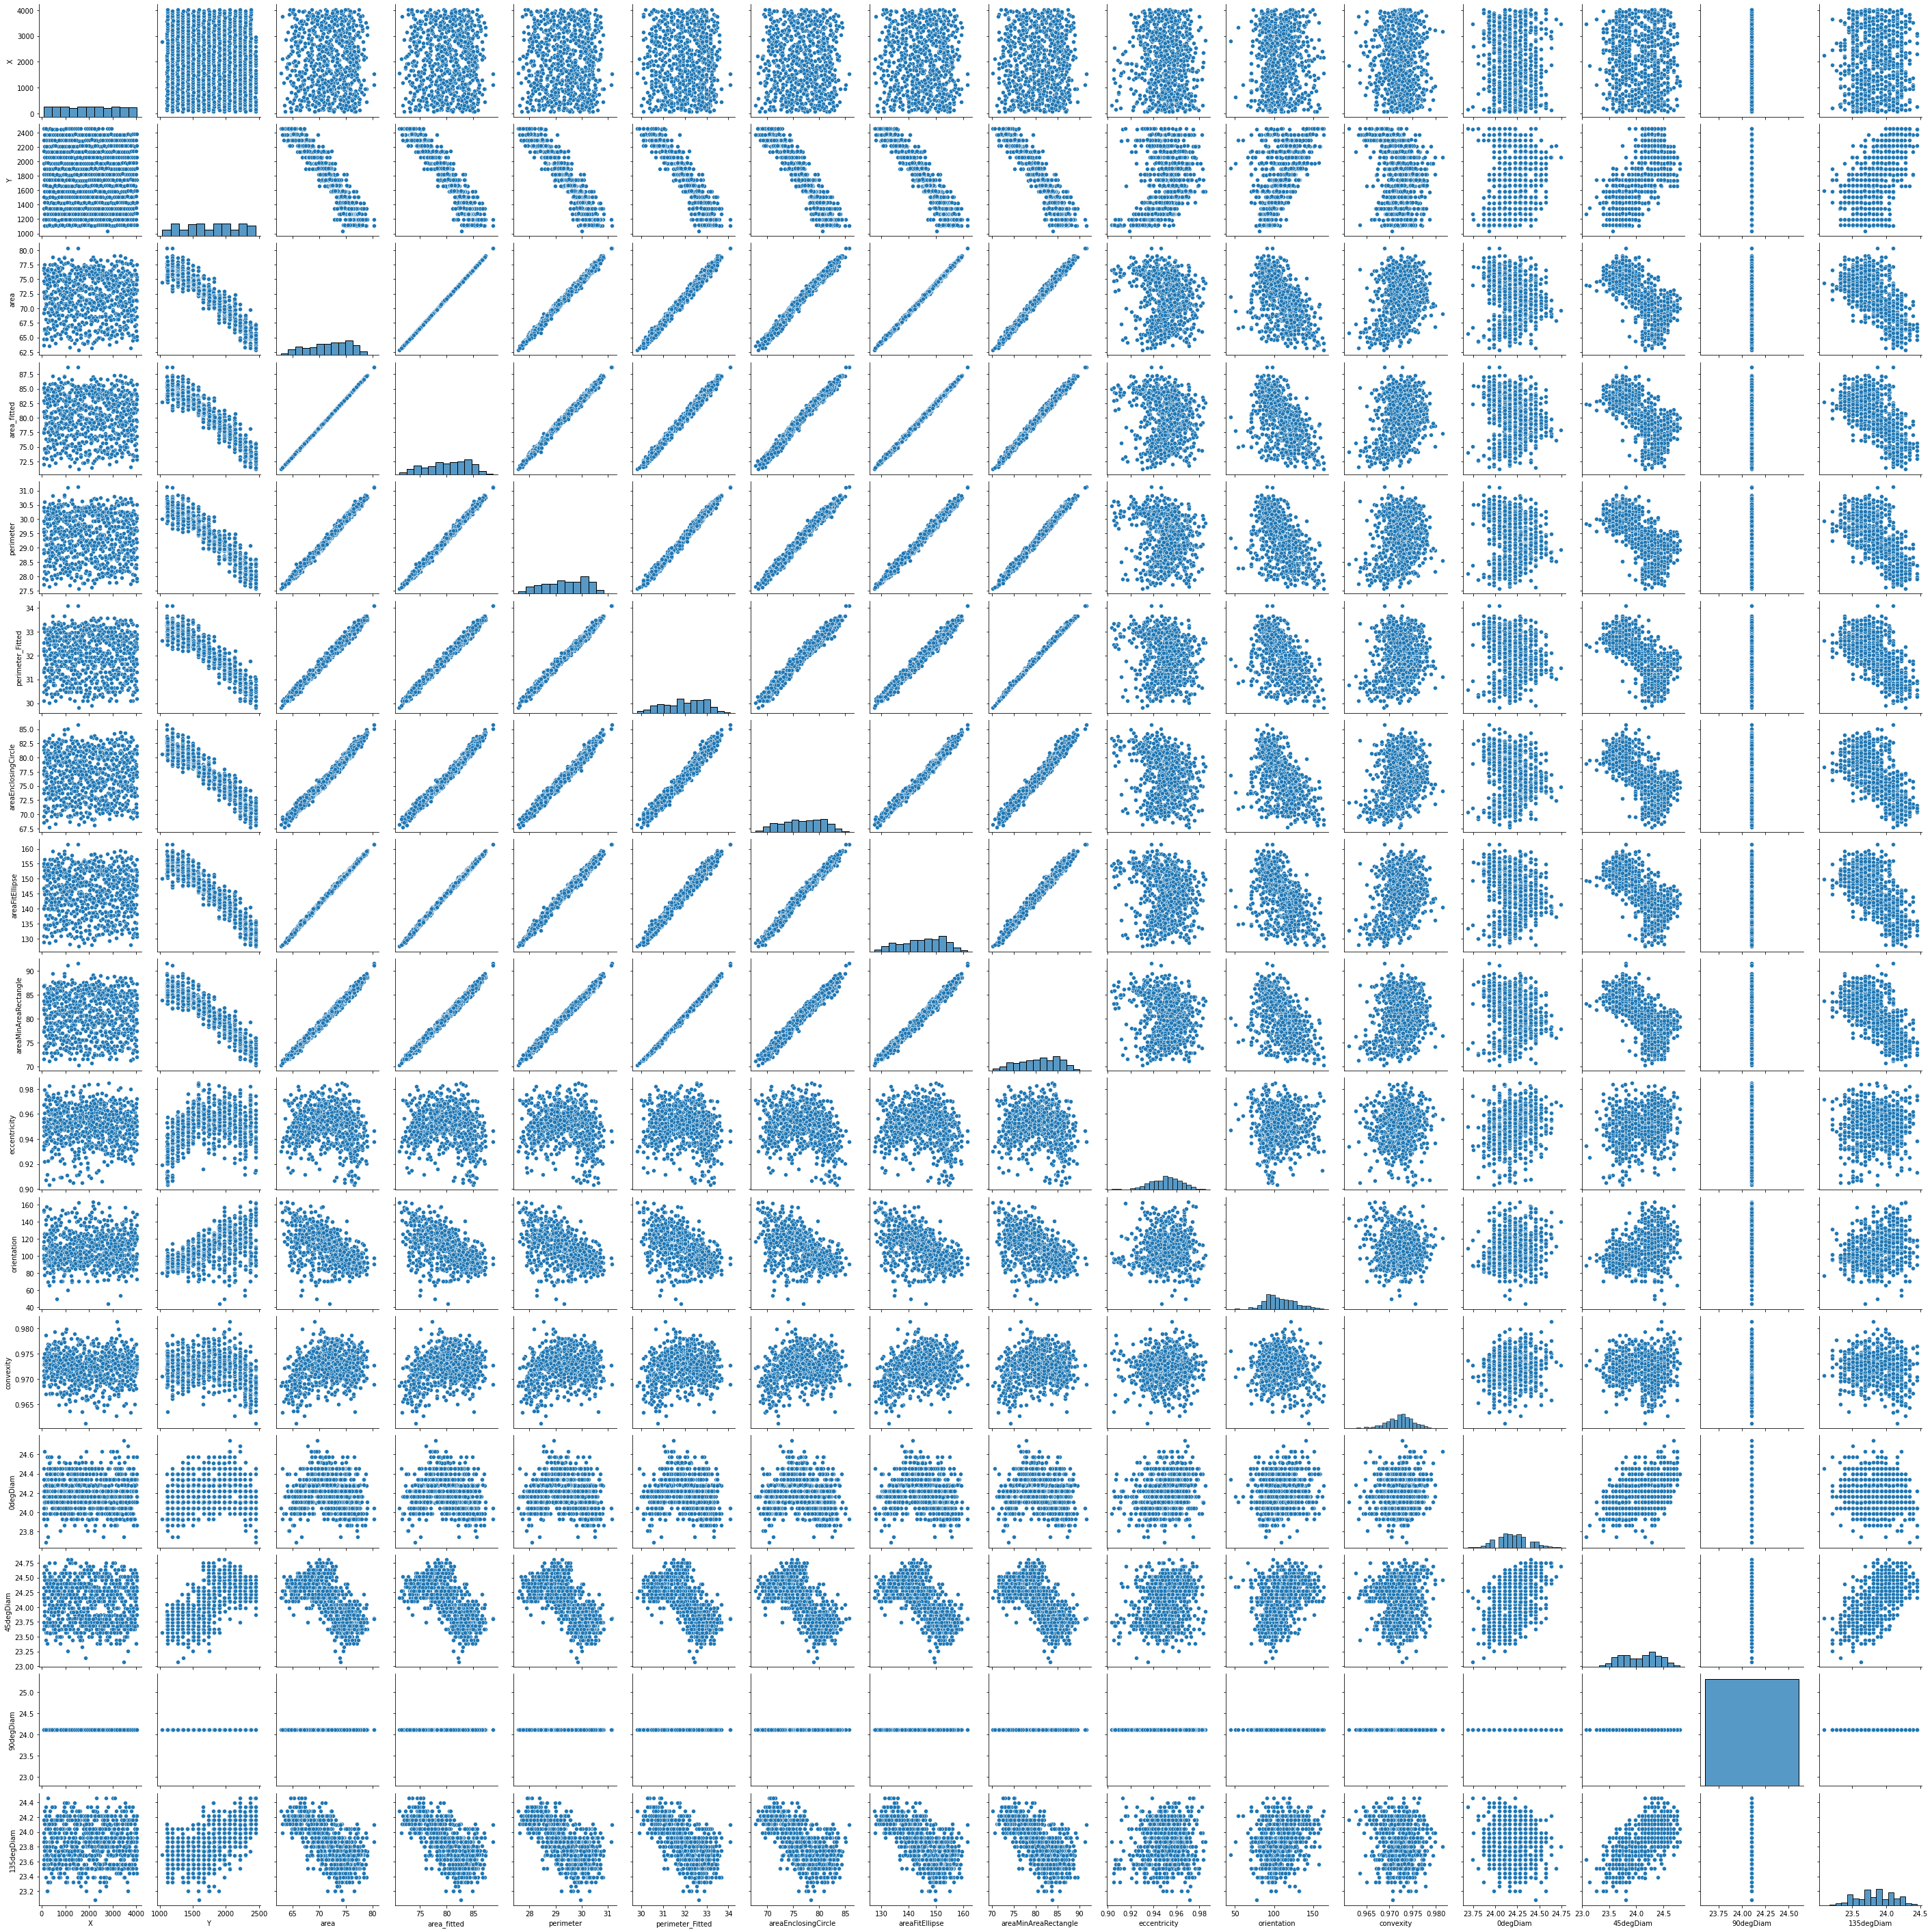

In [20]:
#Although our interest is mainly to see the relation between the location and the feature value, I am 
# plotting a grid of scatter-plots of all features to see if there is some unknown (unexpected) correlation between features
#that we have not seen earlier

# Call the .pairplot() method on our Seaborn object 'sns', and plug in our df data as a parameter. 
df = copy.deepcopy(mean[0])
df.drop('label', axis=1, inplace=True)
sns.pairplot(df)

what we can conclude from the above?
1. Location X has no explicit relation with the variation in the feature values (for all the features)
2. Location Y on the other hand shows a specific pattern with respect to features related to the area/size family
       It appears that features such as area, area_fitted, perimeter, perimeter_fitted, enclosingCircle area, bestfitEllipse area,    and enclosing rectangle area, decrease in their values as the Y increases. Increase in Y means traversing from top to bottom    of the image (raster scan). This is an interesting observation indicating some fault in imaging or orientation of the specimen with respect to imaging direction.
       Interestingly, the diameters (which are proportional to the area/size) appears to show a diffrent relation. But that can be explained with varying orientation of the channel holes. 

Let us checkout the clustering and how it might be related to location

In [85]:
df = copy.deepcopy(mean[0])
df.drop('label', axis=1, inplace=True)
df_Y = df.sort_values(by=['Y'])
df_Y.head()

X       Y       area area_fitted perimeter perimeter_Fitted  \
0   2774.0  1038.0  74.434431   82.771644  30.00122        32.638195   
1    966.0  1108.0  78.832161   87.166477  30.79251        33.663984   
11  3008.0  1110.0   76.82415   85.148625   30.4286        33.157683   
10  2910.0  1110.0  75.810299   84.097589  30.18949        32.811811   
7   1522.0  1110.0  80.334959   88.707044  31.14697        34.087869   

   areaEnclosingCircle areaFitEllipse areaMinAreaRectangle eccentricity  \
0             80.55867     150.126214            83.956848     0.919148   
1            84.973692     159.146308            89.476146     0.920329   
11           82.467988     154.810304            86.384028     0.927028   
10           81.074812     153.273468            85.043005     0.926601   
7            85.734118     161.431815            91.608684     0.937961   

   orientation convexity   0degDiam  45degDiam  90degDiam 135degDiam  
0    80.748525  0.970586  23.927177  23.566883  24.105076  23.687745  
1    78.545408  0.972554  23.984699  24.043139  24.105076  23.926732  
11   91.697408  0.972157  23.924095  23.687745  24.105076  24.044897  
10   89.126277  0.972508  23.866987  23.923176  24.105076  23.806789  
7    90.390991  0.968945  23.926732  23.807688  24.105076  24.102004

In [86]:
del df_Y["X"]

In [87]:
df_Y.head()

Y       area area_fitted perimeter perimeter_Fitted  \
0   1038.0  74.434431   82.771644  30.00122        32.638195   
1   1108.0  78.832161   87.166477  30.79251        33.663984   
11  1110.0   76.82415   85.148625   30.4286        33.157683   
10  1110.0  75.810299   84.097589  30.18949        32.811811   
7   1110.0  80.334959   88.707044  31.14697        34.087869   

   areaEnclosingCircle areaFitEllipse areaMinAreaRectangle eccentricity  \
0             80.55867     150.126214            83.956848     0.919148   
1            84.973692     159.146308            89.476146     0.920329   
11           82.467988     154.810304            86.384028     0.927028   
10           81.074812     153.273468            85.043005     0.926601   
7            85.734118     161.431815            91.608684     0.937961   

   orientation convexity   0degDiam  45degDiam  90degDiam 135degDiam  
0    80.748525  0.970586  23.927177  23.566883  24.105076  23.687745  
1    78.545408  0.972554  23.984699  24.043139  24.105076  23.926732  
11   91.697408  0.972157  23.924095  23.687745  24.105076  24.044897  
10   89.126277  0.972508  23.866987  23.923176  24.105076  23.806789  
7    90.390991  0.968945  23.926732  23.807688  24.105076  24.102004

In [88]:
print(len(df_Y["Y"]))

760


In [89]:
Ylabel=[]
for i in range(1, (len(df_Y["Y"])+1)):
    Ylabel.append(i)

In [90]:
df_Y.insert(1, "Y_label", Ylabel, True)

In [91]:
df_Y.head()

Y  Y_label       area area_fitted perimeter perimeter_Fitted  \
0   1038.0        1  74.434431   82.771644  30.00122        32.638195   
1   1108.0        2  78.832161   87.166477  30.79251        33.663984   
11  1110.0        3   76.82415   85.148625   30.4286        33.157683   
10  1110.0        4  75.810299   84.097589  30.18949        32.811811   
7   1110.0        5  80.334959   88.707044  31.14697        34.087869   

   areaEnclosingCircle areaFitEllipse areaMinAreaRectangle eccentricity  \
0             80.55867     150.126214            83.956848     0.919148   
1            84.973692     159.146308            89.476146     0.920329   
11           82.467988     154.810304            86.384028     0.927028   
10           81.074812     153.273468            85.043005     0.926601   
7            85.734118     161.431815            91.608684     0.937961   

   orientation convexity   0degDiam  45degDiam  90degDiam 135degDiam  
0    80.748525  0.970586  23.927177  23.566883  24.105076  23.687745  
1    78.545408  0.972554  23.984699  24.043139  24.105076  23.926732  
11   91.697408  0.972157  23.924095  23.687745  24.105076  24.044897  
10   89.126277  0.972508  23.866987  23.923176  24.105076  23.806789  
7    90.390991  0.968945  23.926732  23.807688  24.105076  24.102004

In [101]:
df_lab_Y = df_Y[["Y_label", "Y"]]

c:\users\umesh adiga\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y_label', ylabel='Y'>

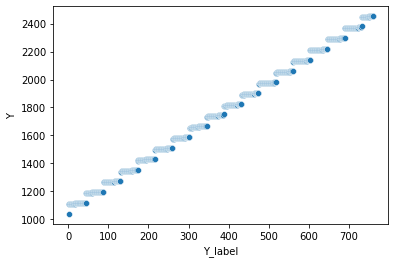

In [102]:
sns.scatterplot(df_lab_Y["Y_label"], df_lab_Y["Y"])

In [92]:
df_Y_area = df_Y[["Y_label", "area"]]
df_Y_area.head()

Y_label       area
0         1  74.434431
1         2  78.832161
11        3   76.82415
10        4  75.810299
7         5  80.334959

Text(0, 0.5, 'Sum of Squares')

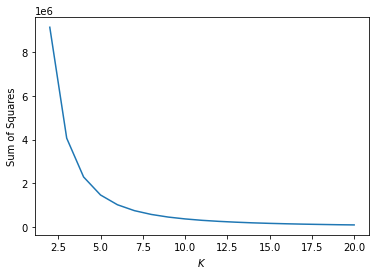

In [93]:
import sklearn.decomposition
import matplotlib.colors
import sklearn.cluster
import numpy as np

# Make an empty list
ss =[]

# Make an empty dictionary called assignments 
assignments = {}
# Cast your table 'df_Y_area' as a matrix with to_numpy(), and store it in a variable X 
X = df_Y_area.to_numpy()

# Make a variable called Krange, and assign it a list of range(2, 11)
Krange  = list(range(2, 21))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster 
    
# Call plot() on plt with parameters Krange and ss
plt.plot(Krange, ss)

# Let's label the plot 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")    

3


([<matplotlib.axis.XTick at 0x173f47af460>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

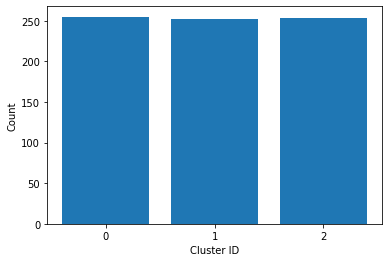

In [112]:
# What is the best K? Fill in the assignment below appropriately
best_K = 3
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

# Call bar() on plt, with parameters range(best_K), counts, and align = 'center'
plt.bar(range(best_K),counts,align='center')

# Label the axes 
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

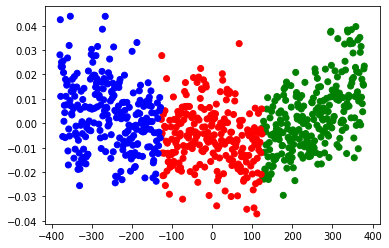

In [113]:
import sklearn.decomposition
import matplotlib.colors

# Make a variable called model. We want n_clusters = 2 as parameter to sklearn.cluster.KMeans 
model = sklearn.cluster.KMeans(n_clusters=3)
# Call a fit_predict() on X 
cluster_assignments = model.fit_predict(X)

# Let's visualiaze with colors.ListedColormap
cmap = matplotlib.colors.ListedColormap(['red','green', 'blue'])

# We're going to do some PCA here. Call decomposition.PCA on sklearn, and pass n_components=2 as parameter
pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

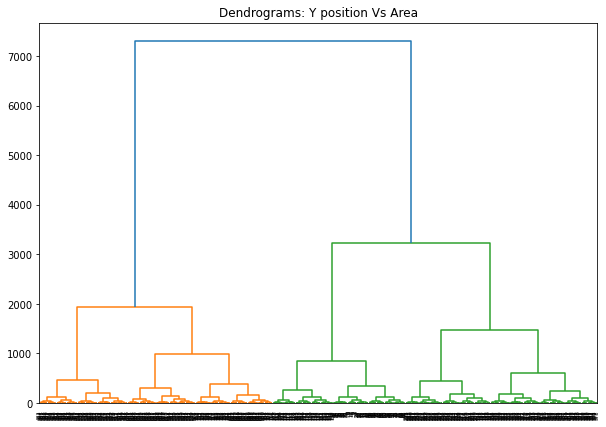

In [114]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms: Y position Vs Area")  
dend = shc.dendrogram(shc.linkage(df_Y_area, method='ward'))

In [115]:
df_Y_eccentricity = df_Y[["Y_label", "eccentricity"]]

Text(0, 0.5, 'Sum of Squares')

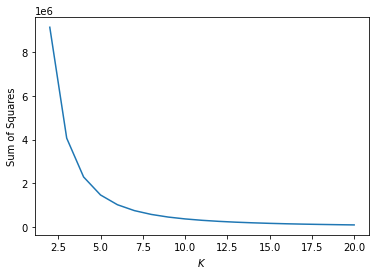

In [116]:
ss =[] 
assignments = {} 
X = df_Y_eccentricity.to_numpy()

# Make a variable called Krange, and assign it a list of range(2, 11)
Krange  = list(range(2, 21))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster 
    
# Call plot() on plt with parameters Krange and ss
plt.plot(Krange, ss)

# Let's label the plot 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")  

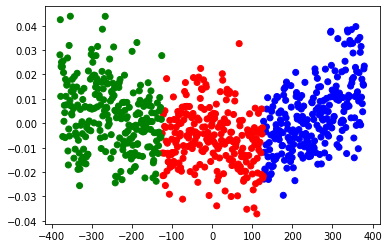

In [117]:
model = sklearn.cluster.KMeans(n_clusters=3)
cluster_assignments = model.fit_predict(X)
cmap = matplotlib.colors.ListedColormap(['red','green', 'blue'])

pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

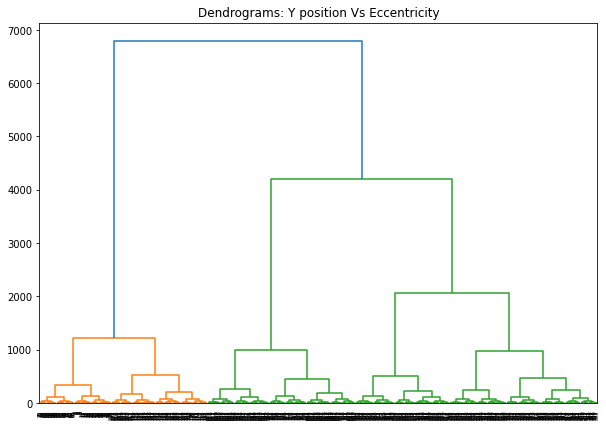

In [118]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms: Y position Vs Eccentricity")  
dend = shc.dendrogram(shc.linkage(df_Y_eccentricity, method='ward'))

In [109]:
del df_Y["Y"]

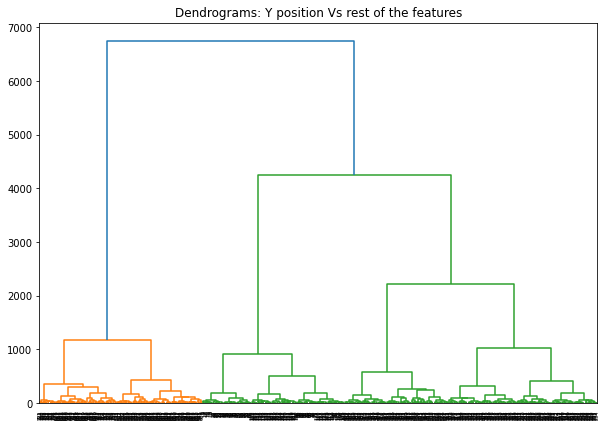

In [110]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms: Y position Vs rest of the features")  
dend = shc.dendrogram(shc.linkage(df_Y, method='ward'))

## 2.0 Summary<a id='2.13_Summary'></a>

The cluster analysis of the data confirms our original belif that there is largely two clusters of shapes and if we force for high clustering, we may find the third cluster. Number of clusters calculation also show this as 2.5 clusters i.e. there is a significant and clean clustering that can be obtained at K=2 and also at K=3. The Dendograms also support this hypothesis.

So, our scatter plot analysis that the area related features of the channel hole decreases as the Y position increases hold true. This confirms some kind of slant or tilt in the specimen with respect to the incident electron beam.

Actual proposal did not really required this clustering analysis done but only to calculate the precision of the channel hole measurement which we have done in the previous step.